#### Name: Md Taskin Hossain

In [220]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import math as mt
from math import sqrt, exp, pi, log
import random
import itertools

In [221]:
data = pd.read_csv("abalone.data", header=None)
data = data.set_axis(['Sex', 'Length',  'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], axis=1)
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [222]:
data.shape

(4177, 9)

In [223]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [224]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [225]:
data.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell_weight       926
Rings               28
dtype: int64

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [227]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Change Rings to Age column shifted by 1.5

In [228]:
data_copy = data
data_copy['Age'] = data_copy['Rings'] + 1.5
data_copy = data_copy.drop(['Rings'], axis=1)
data_copy.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [229]:
#seperate Sex columns
categorical = ['Sex','Age']
non_categorical = []
for i in data_copy.columns:
    if i not in categorical:
        non_categorical.append(i)
print("Categorical columns: ", categorical)
print()
print("Non-Categorical columns: ", non_categorical)

Categorical columns:  ['Sex', 'Age']

Non-Categorical columns:  ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']


### Visualization of columns

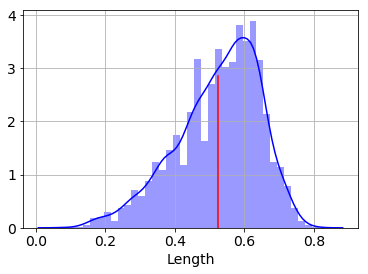

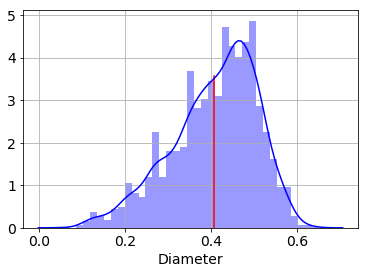

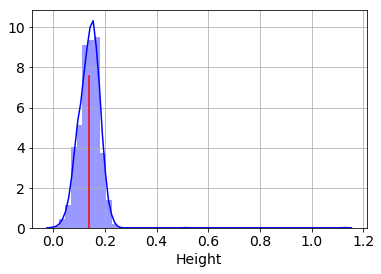

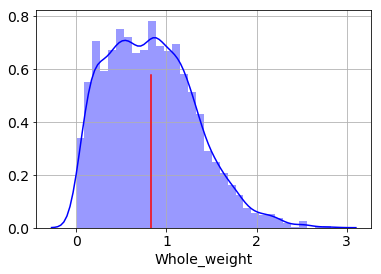

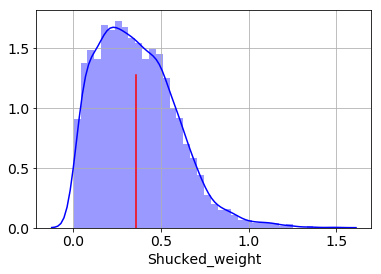

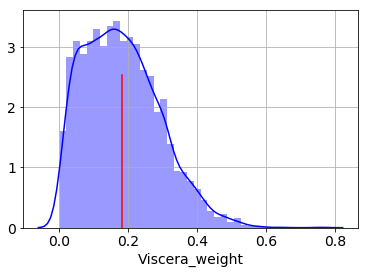

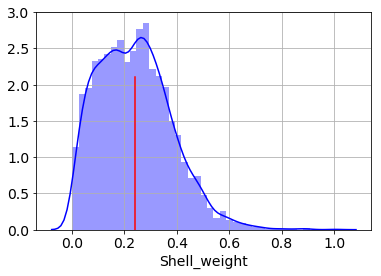

In [234]:
for i,col in enumerate(non_categorical):
    plt.figure(i)
    plt.axvline(data_copy[col].mean(), 0,0.7, color = 'red')
    plt.grid()
    sns.distplot(data_copy[col], color='blue')

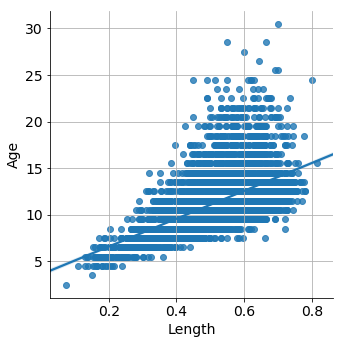

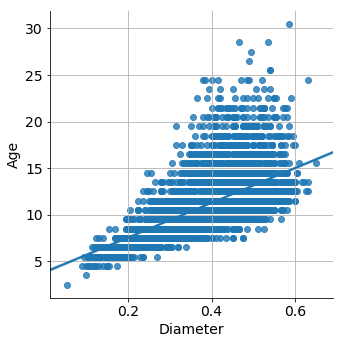

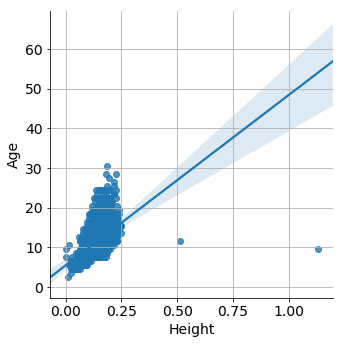

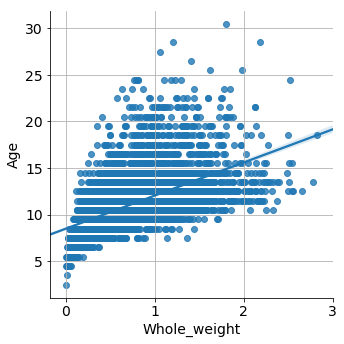

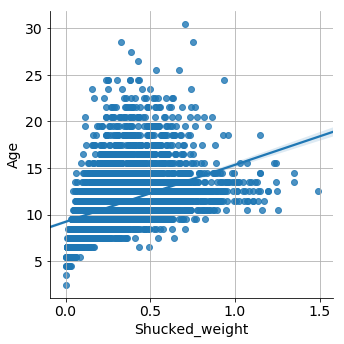

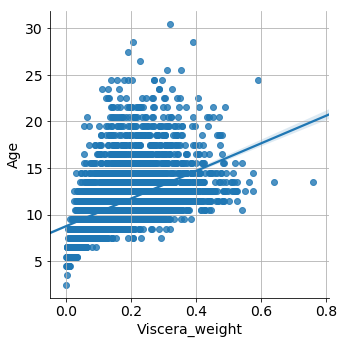

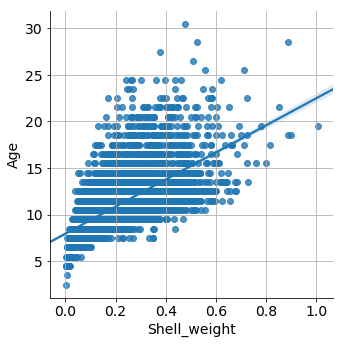

In [238]:
for i,col in enumerate(non_categorical):
    sns.lmplot(x=col, y='Age', data=data_copy)
    plt.grid()

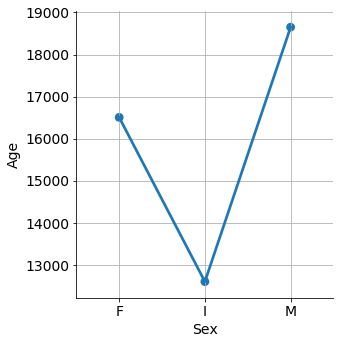

In [239]:
data_cat = pd.DataFrame(data_copy.groupby(['Sex'], as_index = False).sum())
sns.catplot(x='Sex', y='Age', data=data_cat.reset_index(), kind='point')
plt.grid()

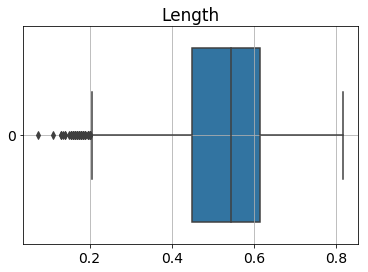

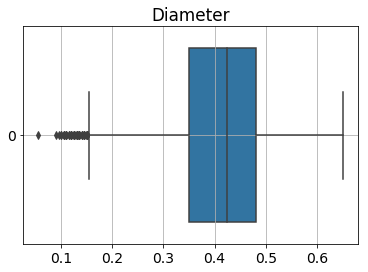

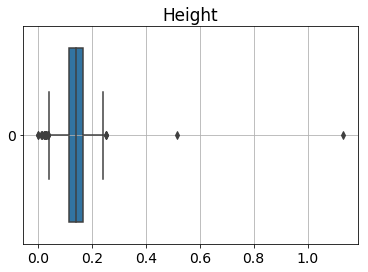

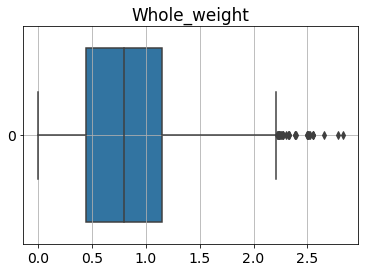

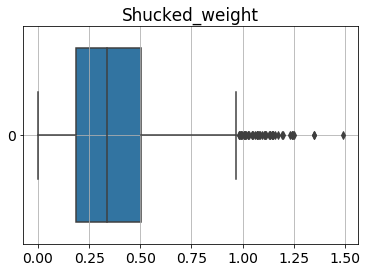

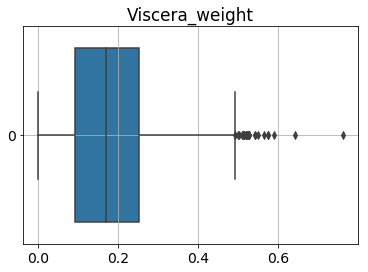

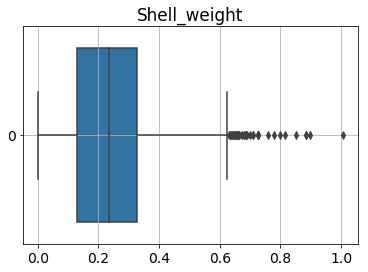

In [240]:
#Checking for outliers
for i, col in enumerate(non_categorical):
    plt.figure(i)
    plt.title(col)
    sns.boxplot(data=data_copy[col], orient='horizontal')
    plt.grid()

### Handling outliers

In [241]:
#Handling outliers
data_copy2 = data_copy
for i in non_categorical:
    q75, q25 = np.percentile(data_copy2[i], [75,25])
    iqr = q75 - q25
    
    low = q25 - (iqr*1.5)
    high = q75 + (iqr*1.5)
    
    data_copy2.loc[data_copy2[i] < low,i] = np.nan
    data_copy2.loc[data_copy2[i] > high,i] = np.nan
    
data_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4128 non-null   float64
 2   Diameter        4118 non-null   float64
 3   Height          4148 non-null   float64
 4   Whole_weight    4147 non-null   float64
 5   Shucked_weight  4129 non-null   float64
 6   Viscera_weight  4151 non-null   float64
 7   Shell_weight    4142 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [242]:
data_imputed = data_copy2[non_categorical]
imputer = KNNImputer(n_neighbors=4, weights='uniform')
data_imputed = pd.DataFrame(imputer.fit_transform(data_imputed), columns = data_imputed.columns)

In [243]:
data_imputed.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.524548,0.408367,0.139354,0.826022,0.356136,0.179943,0.237384
std,0.118596,0.097921,0.037972,0.482464,0.212612,0.107689,0.134815
min,0.205000,0.155000,0.040000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,0.240000,2.210000,0.965500,0.492000,0.625000


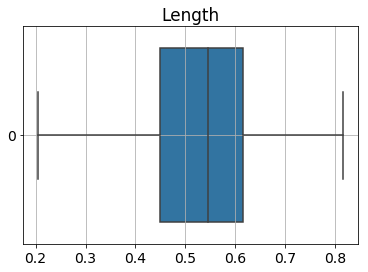

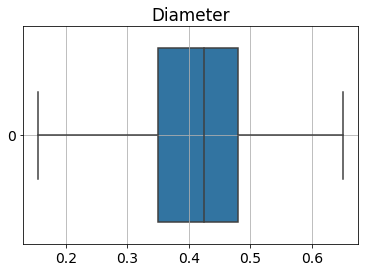

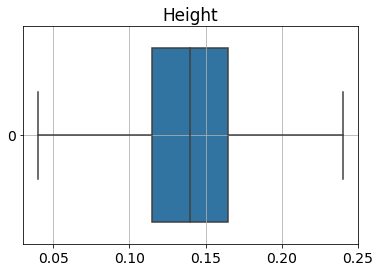

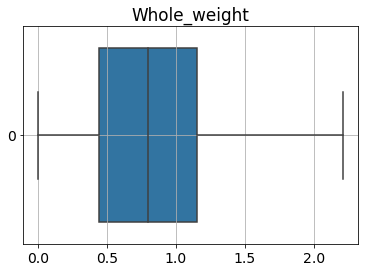

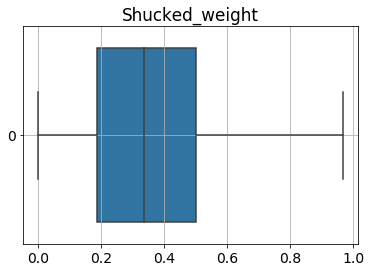

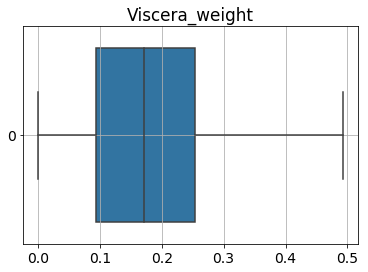

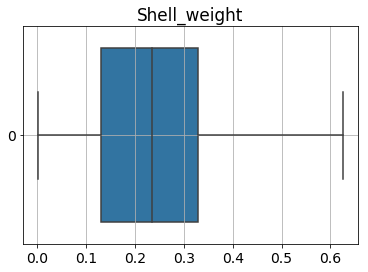

In [245]:
#Checking for outliers
for i, col in enumerate(non_categorical):
    plt.figure(i)
    plt.title(col)
    sns.boxplot(data=data_imputed[col], orient='horizontal')
    plt.grid()

In [246]:
data_imputed = pd.concat([data_copy2['Sex'], data_imputed], axis=1)
data_imputed.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [247]:
data_imputed = pd.concat([data_imputed, data_copy2['Age']], axis=1)
data_imputed

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


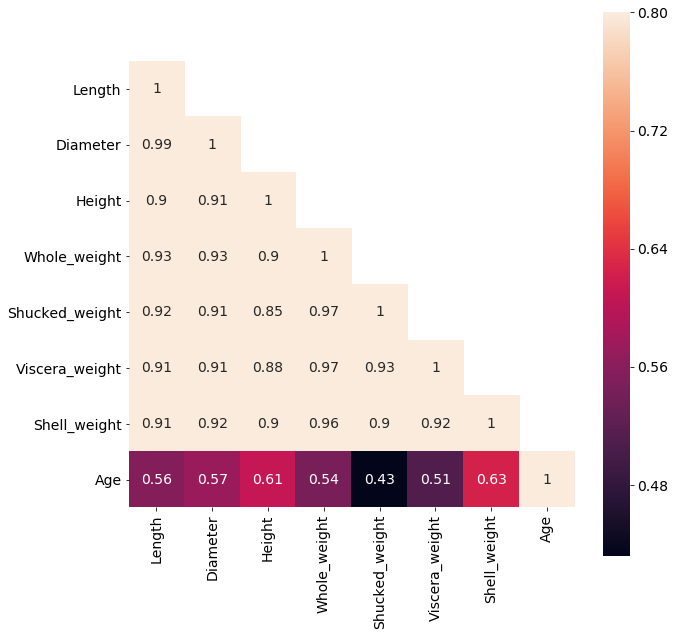

In [248]:
# correlation heatmap

new_non_cat = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Age']
data_corr = data_imputed.loc[:,new_non_cat]
f, ax = plt.subplots(figsize = (10,10))
corr = data_corr.corr()

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
ax = sns.heatmap(corr, mask=mask, vmax=0.8, square=True, annot=True, ax=ax)

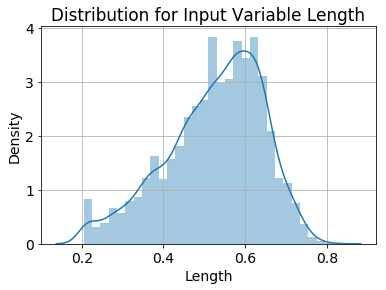

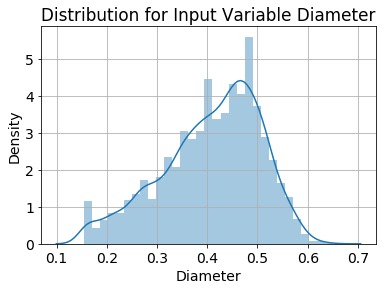

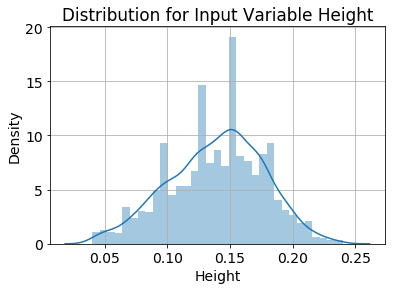

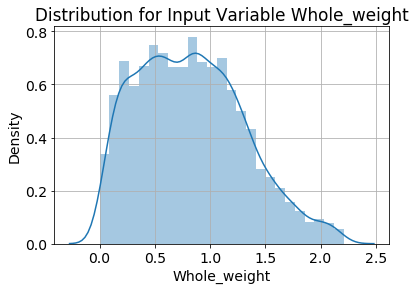

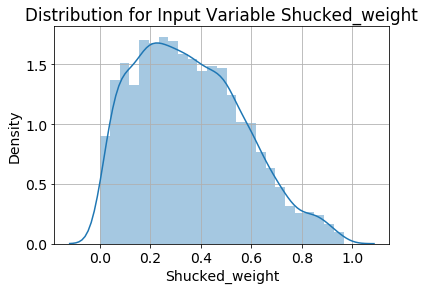

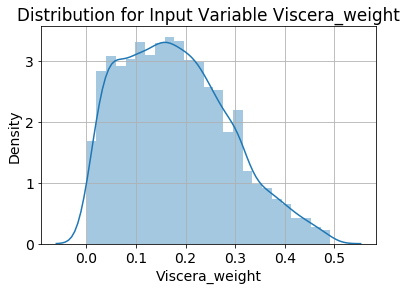

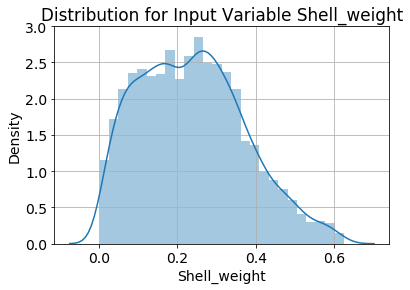

In [249]:
#Feature scaling
for i in new_non_cat:
    if i == 'Age':
        continue
    sns.distplot(data_imputed[i], bins='auto')
    plt.title("Distribution for Input Variable " + str(i))
    plt.ylabel("Density")
    plt.grid()
    plt.show()

In [250]:
cols = list(data_imputed.columns.values)
cols.remove('Age')
cols.insert(len(cols), 'Age')
data_imputed = data_imputed[cols]
data_imputed.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.524548,0.408367,0.139354,0.826022,0.356136,0.179943,0.237384,11.433684
std,0.118596,0.097921,0.037972,0.482464,0.212612,0.107689,0.134815,3.224169
min,0.205000,0.155000,0.040000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,0.240000,2.210000,0.965500,0.492000,0.625000,30.500000


In [251]:
target = ['Age']
features = []
for i in data_imputed.columns:
    if i not in target:
        features.append(i)
print("Target column: ", target)
print()
print("Feature columns: ", features)

Target column:  ['Age']

Feature columns:  ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']


In [252]:
#change problem to classification problem over regression problem

data_imputed['Age'] = data_imputed['Age'].mask(data_imputed['Age'] < 12, 1)
data_imputed['Age'] = data_imputed['Age'].mask(data_imputed['Age'] >= 21.5, 3)
data_imputed

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1.0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0


In [253]:
data_imputed['Age'] = data_imputed['Age'].mask(data_imputed['Age'] > 3, 2)
data_imputed['Age'].value_counts()

1.0    2730
2.0    1385
3.0      62
Name: Age, dtype: int64

In [254]:
data_imputed = data_imputed.astype({"Age": int})
data_imputed

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


### Functions to set up naive bayes and train test splits

In [255]:
def calculate_y_prior(train):
    y_prior = {
        0: 0,
        1: 0,
        2: 0
    }
    
    counts = train["Age"].value_counts(ascending=True)
                
    total_num = len(train)
    y_prior[1] = round((counts[1]/total_num), 4) 
    y_prior[2] = round((counts[2]/total_num), 4) 
    y_prior[3] = round((counts[3]/total_num), 4) 
    
    return y_prior        

In [256]:
def calculate_sex_likelihoods(train):
    sex_likelihoods = {
      "F": [0,0,0,0],
      "I": [0,0,0,0],
      "M": [0,0,0,0]
    }

    for i in range(len(train)):
        for j in range(1,4):
            if(train.iat[i,0]=="F" and train.iat[i,8]==j): 
                sex_likelihoods["F"][j] += 1
            elif(train.iat[i,0]=="I" and train.iat[i,8]==j): 
                sex_likelihoods["I"][j] += 1
            elif(train.iat[i,0]=="M" and train.iat[i,8]==j): 
                sex_likelihoods["M"][j] += 1

    y_numbers = train['Age'].value_counts(ascending=True)

    array = [0,y_numbers[1],y_numbers[2],y_numbers[3]]
    for i in range(1,4):
        sex_likelihoods["F"][i] = round((sex_likelihoods["F"][i]/array[i]),4)
        sex_likelihoods["I"][i] = round((sex_likelihoods["I"][i]/array[i]),4)
        sex_likelihoods["M"][i] = round((sex_likelihoods["M"][i]/array[i]),4)

    return sex_likelihoods

In [257]:
def calculate_train_values(train):
    train_values = {
        "length"    : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "diameter"  : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "height"    : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "whole_w"   : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "shucked_w" : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "viscera_w" : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]},
        "shell_w"   : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "std":[0,0,0,0]}
    }

    keys = [] 
    for key in train_values.keys(): 
        keys.append(key) 

    for i in range(len(train)):
        for j in range(1,4):
            if(train.iat[i,8]==j): 
                for index in range(len(keys)):
                    train_values[keys[index]][j].append(train.iat[i,(index+1)])
    for i in range(1,4):
        for index in range(len(keys)):
            train_values[keys[index]]["mean"][i] = round((np.mean(train_values[keys[index]][i])),4)
            train_values[keys[index]]["std"][i]  = round((np.std(train_values[keys[index]][i])),4)   
    return train_values,keys

In [258]:
def calculate_probability_density(num,mean,std):
    equation  = (1 / (mt.sqrt(2*mt.pi)*std)) * mt.exp(-(mt.pow(num-mean,2))/(2*mt.pow(std,2)))
    
    return round((equation),4) 

In [259]:
def predict_gaussian(test,sex_likelihoods,train_values,y_prior,keys):
    
    predictions=[]
    for row in range(len(test)):
        elementPrediction= [0,1,1,1]

        for i in range(1,4):
            if  (test.iat[row,0] == "M"): elementPrediction[i] *= sex_likelihoods["M"][i]
            elif(test.iat[row,0] == "I"): elementPrediction[i] *= sex_likelihoods["I"][i]
            elif(test.iat[row,0] == "F"): elementPrediction[i] *= sex_likelihoods["F"][i]

            for index in range(len(keys)):
                elementPrediction[i] *= calculate_probability_density(test.iat[row,index+1],train_values[keys[index]]["mean"][i],
                                                          train_values[keys[index]]["std"][i])
            elementPrediction[i] *= y_prior[i]
            elementPrediction[i] = round((elementPrediction[i]),4)
        predictions.append(elementPrediction.index(max(elementPrediction)))
        
    return predictions

In [260]:
def result(predictions,validation):
    confusion_matrix = [[0,0,0],[0,0,0],[0,0,0]]
    
    if(len(predictions) != len(validation)):
        print("Length is not true")
    else:
        for i in range(len(validation)):
            for item in range(1,4):
                if(validation.iat[i,8] == item):
                    confusion_matrix[item-1][predictions[i]-1] +=1
    true_classification = confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[2][2]
    miss_classification = len(validation) - true_classification
    accuracy            = true_classification / len(validation)
    print("confusion matrix: ",confusion_matrix)
    print("total correct classification : ",true_classification)
    print("total missclassification  : ",miss_classification)
    print("accuracy  : ",accuracy)
    plot(confusion_matrix)
    
    return confusion_matrix

In [261]:
def plot(confusion_matrix):
    confusion_matrix = np.array(confusion_matrix)

    
    classes = ["Young","MiddleAged", "Old"]
    
    plt.figure(figsize=(8, 6))

    plt.imshow(confusion_matrix,interpolation="nearest",cmap=plt.cm.Greys)
    #plt.title('Confusion Matrix')
    
    plt.colorbar()
    
    tickMarks = np.arange(len(classes))
    plt.xticks(tickMarks, classes, rotation=45)
    plt.yticks(tickMarks, classes)

    
    thresh = confusion_matrix.max() / 2
    x = confusion_matrix.shape[0]
    y = confusion_matrix.shape[1]
    
    plt.rcParams.update({'font.size': 14})
    for i, j in itertools.product(range(x), range(y)):
        plt.text(j,i, format(confusion_matrix[i,j], 'd'), ha="center", va="baseline",
                color="red" if confusion_matrix[i,j] > thresh else "red")
    
    plt.tight_layout()
    plt.ylabel('Real Label')
    plt.xlabel('Predicted Label')
    
    print("\nConfusion Matrix:")
    print(confusion_matrix)
    
    plt.show()

In [262]:
def gaussian_distribution(train,validation,option):    
    
    y_prior = calculate_y_prior(train)
    sex_likelihoods = calculate_sex_likelihoods(train)
    train_values,keys = calculate_train_values(train)
    
    if(option == "Validation"): predict_set = validation
    elif(option == "Train"): predict_set = train
        
    predictions = predict_gaussian(predict_set,sex_likelihoods,train_values,y_prior,keys)
    confusion_matrix = result(predictions,predict_set)
    
    return confusion_matrix

In [263]:
# Split the data into training set and testing set
def train_test_split(data, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(data))
    
    data_index = data.index.tolist()
    test_index = random.sample(population=data_index, k=test_size)
    
    test_set = data.loc[test_index]
    train_set = data.drop(test_index)
    
    return train_set, test_set

In [264]:
train_set, test_set = train_test_split(data_imputed, 3/10)
train_set.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000
mean,0.523755,0.408001,0.139018,0.824523,0.354205,0.179927,0.237098,1.363201
std,0.119224,0.098403,0.038036,0.484700,0.212257,0.108655,0.135466,0.510003
min,0.205000,0.155000,0.040000,0.008000,0.002500,0.000500,0.003000,1.000000
25%,0.450000,0.350000,0.115000,0.440875,0.185375,0.092375,0.130000,1.000000
50%,0.540000,0.420000,0.140000,0.790750,0.332750,0.168500,0.230000,1.000000
75%,0.615000,0.480000,0.165000,1.160500,0.505500,0.253125,0.325125,2.000000
max,0.815000,0.650000,0.240000,2.210000,0.965500,0.492000,0.625000,3.000000


confusion matrix:  [[1286, 618, 0], [301, 672, 5], [9, 32, 1]]
total correct classification :  1959
total missclassification  :  965
accuracy  :  0.6699726402188783

Confusion Matrix:
[[1286  618    0]
 [ 301  672    5]
 [   9   32    1]]


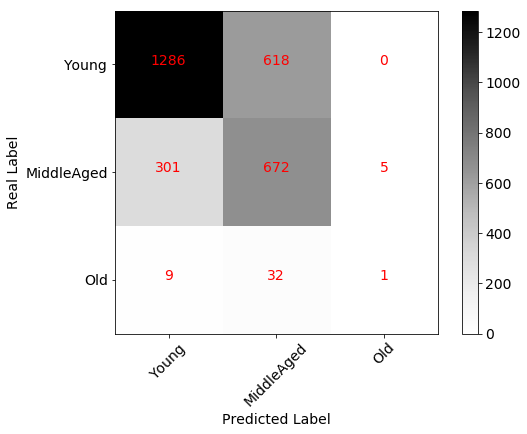

In [265]:
confusion_mat = gaussian_distribution(train_set,test_set,"Train")